# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL) - Esercitazione 10</span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397



# Esercizio 1
Parallelizzare con una libreria di MPI l'algoritmo genetico ideato nell'esercitazione 9 performando una *Ricerca Genetica* con fino a 10 **GA ricerche parallele** del percorso ottimale:
ogni nodo deve performare una ricerca indipendente, il cosiddetto *Continent*, ma ogni $N_{migr}$ generazioni il *Continente* dovrebbe scambiare i suoi migliori individui. 


### Spiegazione dell'algoritmo
Il codice è stato pensato per eseguire una ricerca in parallelo su un numero pari di cores. In particolare testeremo il funzionamento del codice su 2, 4, 6, 8, 10 cores.
L'algoritmo è strutturato in modo analogo a quello dell'esercitazione precedente: si parte col generare una popolazione di partenza, di $N = 400$ individui, cioè di diversi percorsi. A differenza dell'esercitazione precedente prendiamo in input le posizioni delle città per generare il percorso di partenza. 

A questo punto si avvia l'evoluzione della popolazione su ciascun continente (core), in maniera indipendente l'uno dall'altro.
Una volta definito da terminale il numero di cores su cui lavorare, ogni $N_{migr} = 5$ iterazioni del codice impostiamo lo scambio di informazioni tra i cores:
- si definisce un vector di "indici di cores" ad ex [0, 1, 2, 3, 4, 5, 6]
- si riordina casualmente il vector con il metodo `random_shuffle`
- in ordine scambiamo con i metodi `send` e `receive` le informazioni relative al core nella prima posizione con quello che si trova nella seconda posizione e così fino a scambiare su tutti i core.
Per ogni coppia di cores scambiamo i valori salvati in `best_path`

   `MPI_Isend()`: inviamo al core [i+1] dal core[i]
   
   `MPI_Recv()` : inviamo dal core [i] al core[i+1]

Si salvano quindi i risultati relativi all'andamento delle distanze e del miglior percorso su file. 

# Esercizio 2 
Applicare il codice del TSP problem per 50 capitali degli USA. Utilizziamo come file di input *American_capitals.dat* che contiene le informazioni sulle coordinate di latitudine e longitudine. Valutare la differenza nei risultati nell'uso di 1 continente o di 10 continenti independenti

## Soluzione

Testiamo l'algoritmo su 1 solo Core e confrontiamo quindi i risultati ottenuti utilizzando un numero maggiore di cores. Eseguiamo $N = 2000$ iterazioni, eseguendo $N_{couples} = 100$ accoppiamenti ad ogni iterazione.  

## Algoritmo non Parallelizzato

Riportiamo di seguito i risultati ottenuti utilizzando l'algoritmo non parallelizzato

In [119]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

In [120]:
x, y = np.loadtxt("American_capitals.dat", usecols=(2,3), unpack='true')
x_best, y_best = np.loadtxt("Results/American_Capitals_Best_Path_1_core.dat", usecols=(1,2), unpack='true')

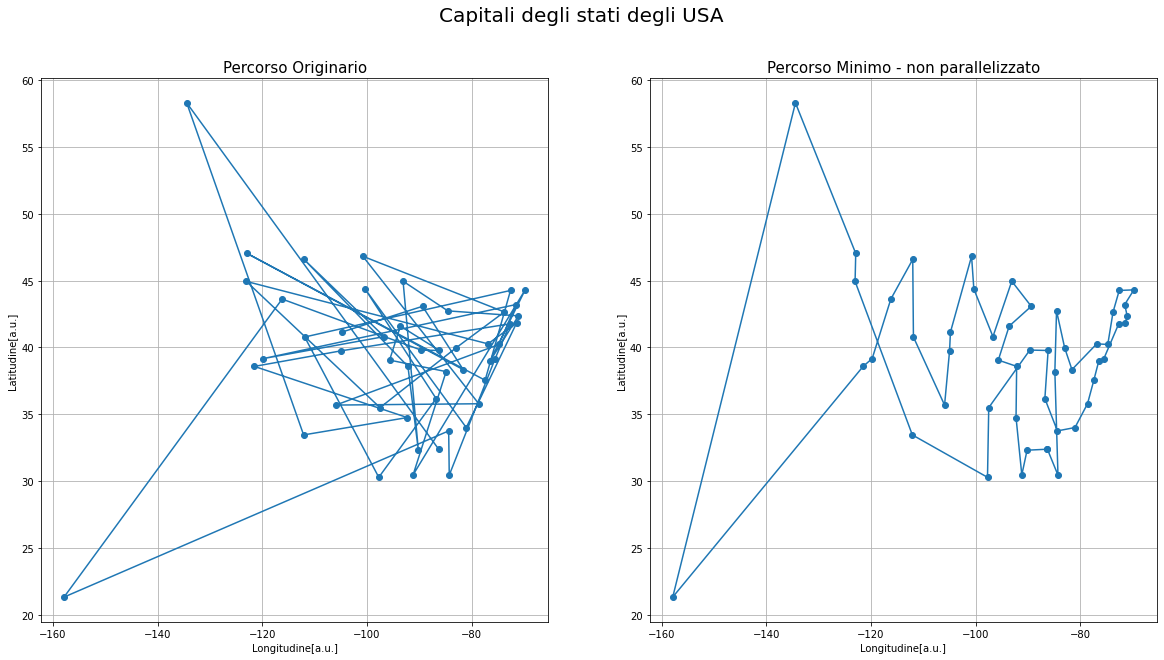

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Capitali degli stati degli USA', fontsize = 20)
ax1.plot(x, y , marker= 'o')
ax1.set_title("Percorso Originario", fontsize = 15)
ax1.set_xlabel("Longitudine[a.u.]")
ax1.set_ylabel("Latitudine[a.u.]") 
ax1.grid()


ax2.plot(x_best, y_best , marker= 'o')
ax2.set_title("Percorso Minimo - non parallelizzato", fontsize = 15)
ax2.set_xlabel("Longitudine[a.u.]")
ax2.set_ylabel("Latitudine[a.u.]") 
ax2.grid()


Osserviamo che l'algoritmo con questi numeri non riesce trovare il percorso minimo. 

## Soluzione

## Algoritmo Parallelizzato
### Andamento dei percorsi migliori

In [13]:
colors = {"single core" : "#f5c414", "2cores": "#801a86", "4cores": "#ff7b9c", "6cores": "#58bc82", "8cores": "#347fc4", "10cores": "#F2542D"}

labels = ["single core", "2cores", "4cores", "6cores", "8cores", "10cores"]

files = ['American_capitals_Results_1_core.dat', 
        'Results/2_Rank_Used/American_capitals_Results_2_RankUsed_0.dat',
         'Results/4_Ranks_Used/American_capitals_Results_4_RankUsed_0.dat', 
         'Results/6_Ranks_Used/American_capitals_Results_6_RankUsed_0.dat', 
         'Results/8_Ranks_Used/American_capitals_Results_8_RankUsed_0.dat', 
         'Results/10_Ranks_Used/American_capitals_Results_10_RankUsed_0.dat'
        ]

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

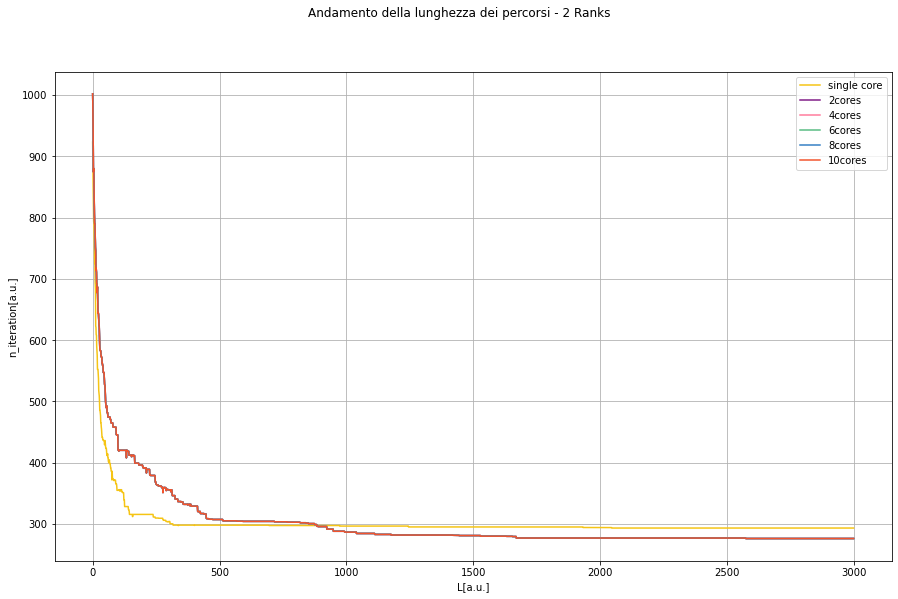

In [15]:
#definition of the figure
k = 0 
fig, ax = plt.subplots(1, 1, figsize = (15, 9))
fig.suptitle('Andamento della lunghezza dei percorsi - 2 Ranks')
for file in files:
    n, L_best, L_mean , L_err= np.loadtxt(file, usecols=(0, 1,2, 3), unpack='true')
    color_name = labels[k]
    ax.plot(n,L_best, color = colors[color_name], label = color_name )
    k = k+1
    
ax.legend()
ax.set_xlabel("L[a.u.]")
ax.set_ylabel("n_iteration[a.u.]")
ax.grid()

Dal grafico si osserva che rispetto al caso precedente, in cui l'algoritmo era non parallelizzato, la lunghezza media tende a convergere un poco più velocemente (scendo sotto il valore di 400 prima delle 200 generazioni). Questo è probabilmente dovuto alla struttura dell'algoritmo parallelizzato che consente sostanzialmente di far evolvere 4 popolazioni in contemporanea e in maniera indipendente l'una dall'altra. In questo modo, quando avviene la migrazione si verifica un miglioramento della performance maggiore rispetto al caso della singola popolazione, evoluzioni in direzioni diverse hanno consentito infatti di trovare possibili migliori soluzioni diverse.



In [18]:
colors = {"single core" : "#f5c414", "2cores": "#801a86", "4cores": "#ff7b9c", "6cores": "#58bc82", "8cores": "#347fc4", "10cores": "#F2542D"}

labels = ["single core", "2cores", "4cores", "6cores", "8cores", "10cores"]

files = ['American_capitals_Results_1_core.dat', 
        'Results/2_Rank_Used/American_capitals_Results_2_RankUsed_0.dat',
         'Results/4_Ranks_Used/American_capitals_Results_4_RankUsed_0.dat', 
         'Results/6_Ranks_Used/American_capitals_Results_6_RankUsed_0.dat', 
         'Results/8_Ranks_Used/American_capitals_Results_8_RankUsed_0.dat', 
         'Results/10_Ranks_Used/American_capitals_Results_10_RankUsed_0.dat'
        ]

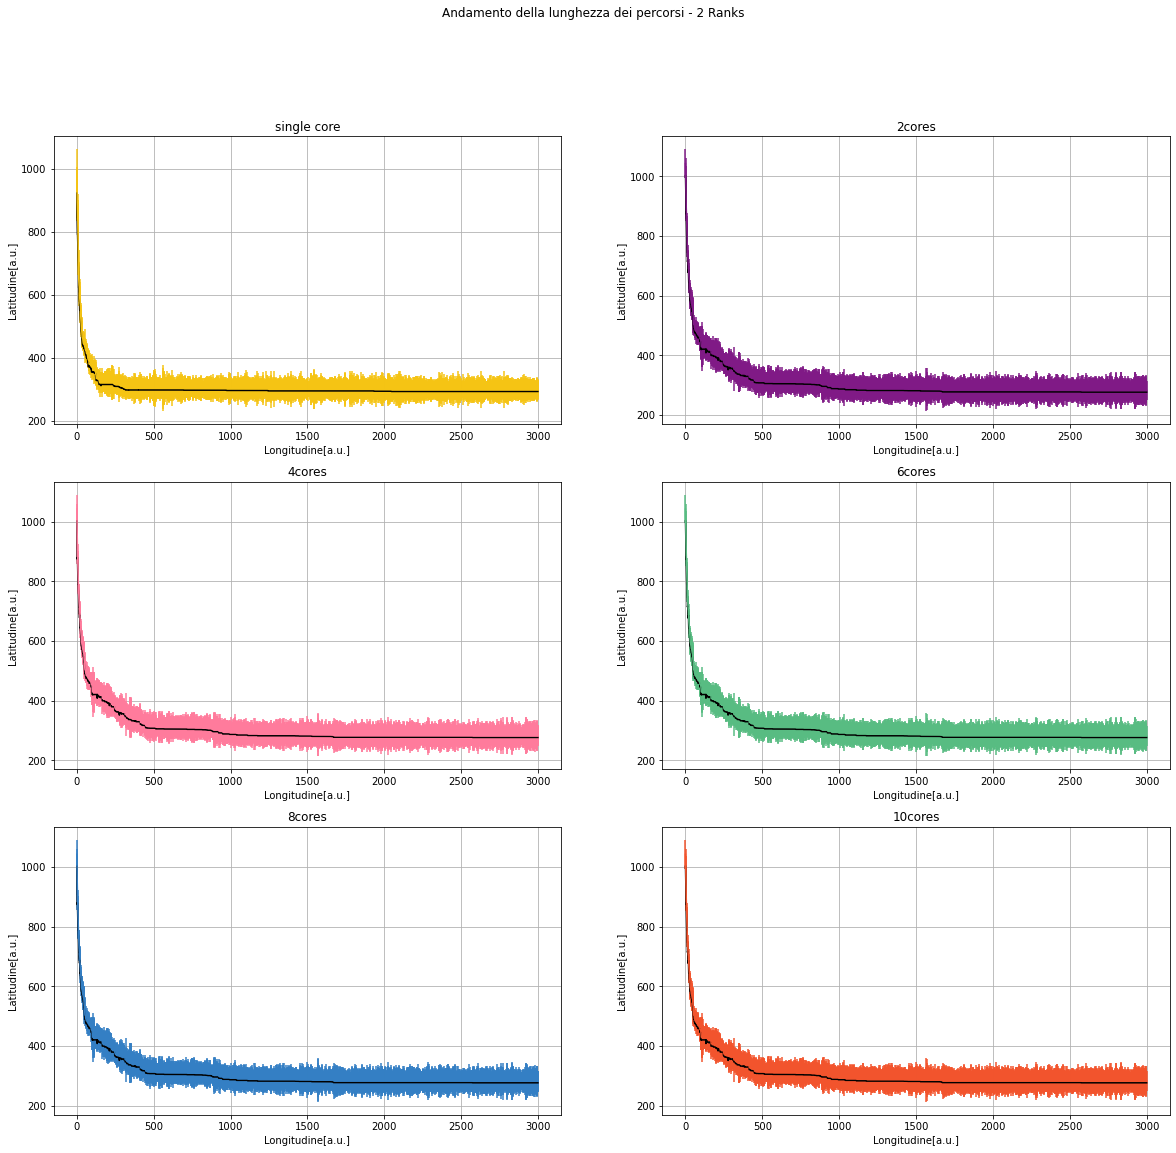

In [25]:
#definition of the figure
fig, ax = plt.subplots(3, 2, figsize = (20, 18))
fig.suptitle('Andamento della lunghezza dei percorsi - 2 Ranks')

k = 0
for i in range(3):
    for j in range(2): 
        file = files[k]
        n, L_best, L_mean , L_err= np.loadtxt(file, usecols=(0, 1,2, 3), unpack='true')
        name = labels[k]
        ax[i][j].set_title(name)
        ax[i][j].plot(n,L_best, color = "black", label = name)
        ax[i][j].errorbar(n, L_mean, L_err, color = colors[name], label = name)
        ax[i][j].set_xlabel("Longitudine[a.u.]")
        ax[i][j].set_ylabel("Latitudine[a.u.]") 
        ax[i][j].grid()
        k=k+1


Grafici, che mostrano come si comporta l'algoritmo parallelizzato, e nelle diverse situazioni

Riportiamo di seguit il percorso migliore identificato dall'algoritmo 

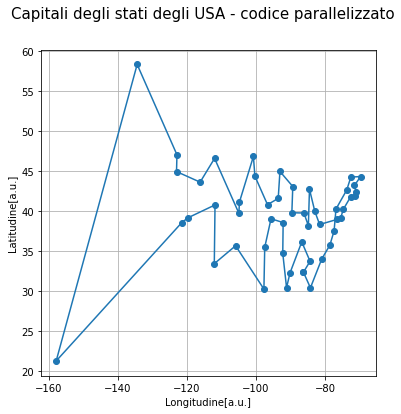

In [84]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
fig.suptitle('Capitali degli stati degli USA - codice parallelizzato', fontsize = 15)
k = 0
file = 'Results/2_Rank_Used/BestPath_2_RanksUsed_0.dat'
x, y = np.loadtxt(file, usecols=(1,2), unpack='true')
ax.plot(x, y , marker= 'o')
ax.set_xlabel("Longitudine[a.u.]")
ax.set_ylabel("Latitudine[a.u.]") 
ax.grid()

Quindi osserviamo come a partià di iterazioni il codice parallelizzato permetta di ottenere un cammino migliore